<a href="https://colab.research.google.com/github/feniltailor22/Data-Structure-and-Algorithms/blob/main/Binary_Search_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 


In this notebook, we'll focus on solving the following problem:

> **QUESTION 1**: As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
> 
> 1. **Insert** the profile information for a new user.
> 2. **Find** the profile information of a user, given their username
> 3. **Update** the profile information of a user, given their usrname
> 5. **List** all the users of the platform, sorted by username
>
> You can assume that usernames are unique. 


## The Method


Here's a systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.


## 1. State the problem clearly. Identify the input & output formats.

#### Problem

> We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.

#### Input

The key inputs to our data structure are user profiles, which contain the username, name and email of a user. 

A Python _class_ would be a great way to represent the information for a user. A class is a blueprint for creating _objects_. Everything in Python is an _object_ belonging to some _class_. Here's the simples possible class in Python, with nothing in it:

In [1]:
#First we will understand __str__ and __repr__ function:
import datetime

In [2]:
today= datetime.date.today()

In [3]:
str(today)

'2021-10-02'

In [4]:
today

datetime.date(2021, 10, 2)

In [5]:
repr(today)

'datetime.date(2021, 10, 2)'

In [6]:
today

datetime.date(2021, 10, 2)

In [7]:
#__str__ is easy to read and for human consumption.
#__repr__ is unambiguous and useful for backend operaations.

In [8]:
class Car:
  def __init__(self, color, mileage):
    self.color= color
    self.mileage= mileage
  
  def __str__(self):
    return 'Car(Color: {self.color}, Mileage: {self.mileage})'.format(self=self)

In [9]:
my_car= Car('red', 55)

In [10]:
print(my_car)

Car(Color: red, Mileage: 55)


In [11]:
my_car

In [12]:
str(my_car)

'Car(Color: red, Mileage: 55)'

In [13]:
repr(my_car)

'<__main__.Car object at 0x7fee5b276490>'

In [14]:
class Car:
  def __init__(self, color, mileage):
    self.color= color
    self.mileage= mileage
  
  def __repr__(self):
    return 'Car(Color: {self.color}, Mileage: {self.mileage})'.format(self=self)

In [15]:
my_car= Car('blue', 63)

In [16]:
print(my_car)

Car(Color: blue, Mileage: 63)


In [17]:
my_car

Car(Color: blue, Mileage: 63)

In [18]:
class User:
  def __init__(self, username, name, email):
    self.username= username
    self.name= name
    self.email= email

  def __repr__(self):
    #return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)
    return ('User(username={}, name={}, email={})').format(self.username, self.name, self.email)

In [19]:
fenil= User('ft', 'fenil', 'ft@gmail.com')  

In [20]:
fenil

User(username=ft, name=fenil, email=ft@gmail.com)

## 2. Come up with some example inputs & outputs. 

Let's create some sample user profiles that we can use to test our functions once we implement them.

In [21]:
ankur= User('as', 'ankur', 'as@gmail.com')
abhi= User('ab', 'abhi', 'ap@gmail.com')
mayank= User('mk', 'mayank', 'mk@gmail.com')
karan= User('kp', 'karan', 'kp@gmail.com')
keyur= User('ks', 'keyur', 'ks@gmail.com')
vinay= User('vp', 'vinay', 'vp@gmail.com')

In [22]:
users= [fenil, ankur, abhi, mayank, karan, keyur, vinay]

In [23]:
users

[User(username=ft, name=fenil, email=ft@gmail.com),
 User(username=as, name=ankur, email=as@gmail.com),
 User(username=ab, name=abhi, email=ap@gmail.com),
 User(username=mk, name=mayank, email=mk@gmail.com),
 User(username=kp, name=karan, email=kp@gmail.com),
 User(username=ks, name=keyur, email=ks@gmail.com),
 User(username=vp, name=vinay, email=vp@gmail.com)]

## 3. Come up with a correct solution. State it in plain English.

Here's a simple and easy solution to the problem: we store the `User` objects in a list sorted by usernames. 

The various functions can be implemented as follows:

1. **Insert**: Loop through the list and add the new user at a position that keeps the list sorted.
2. **Find**: Loop through the list and find the user object with the username matching the query.
3. **Update**: Loop through the list, find the user object matching the query and update the details
4. **List**: Return the list of user objects.

We can use the fact usernames, which are are strings can be compared using the `<`, `>` and `==` operators in Python.

In [24]:
'v' > 'f'

True

## 4. Implement the solution and test it using example inputs.


In [25]:
class Userdatabase:
  def __init__(self):
    self.users=[]
  
  def insert_user(self, new_user):
    i=0
    while i<len(self.users):
      if new_user.name<self.users[i].name:
        break
      i+=1
    self.users.insert(i, new_user)
  
  def find_user(self, name):
    for i in range(0, len(self.users)):
      if name== self.users[i].name:
        return self.users[i]
      
  def update_user(self, user):
    target= self.find_user(user.name)
    target.username= user.username
    target.email= user.email
    return target
  
  def list_all(self):
    return self.users

In [26]:
database= Userdatabase()

In [27]:
database.insert_user(vinay)
database.insert_user(abhi)
database.insert_user(mayank)

In [28]:
database.list_all()

[User(username=ab, name=abhi, email=ap@gmail.com),
 User(username=mk, name=mayank, email=mk@gmail.com),
 User(username=vp, name=vinay, email=vp@gmail.com)]

In [29]:
database.insert_user(fenil)

In [30]:
database.list_all()

[User(username=ab, name=abhi, email=ap@gmail.com),
 User(username=ft, name=fenil, email=ft@gmail.com),
 User(username=mk, name=mayank, email=mk@gmail.com),
 User(username=vp, name=vinay, email=vp@gmail.com)]

In [31]:
f_user= database.find_user('fenil')

In [32]:
f_user

User(username=ft, name=fenil, email=ft@gmail.com)

In [33]:
u_user= database.update_user(User(username='ft22', name='fenil', email='ft2212@gmail.com'))
u_user

User(username=ft22, name=fenil, email=ft2212@gmail.com)

In [34]:
f_user

User(username=ft22, name=fenil, email=ft2212@gmail.com)

## 5. Analyze the algorithm's complexity and identify inefficiencies

The operations `insert`, `find`, `update` involves iterating over a list of users, in the worst case, they may take up to `N` iterations to return a result, where `N` is the total number of users. `list_all` however, simply returns the existing internal list of users. 

Thus, the time complexities of the various operations are:

1. Insert: **O(N)**
2. Find: **O(N)**
3. Update: **O(N)**
4. List: **O(1)**

To get a sense how long each function might take if there are 100 million users on the platform, we can simply run an `for` or `while` loop on 10 million numbers.

**Space complexity of each operation is O(1).**

## 6. Apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree**:

<img src="https://i.imgur.com/lVqP63n.png" width="520">



It's called a tree because it vaguely like an inverted tree trunk with branches. 
* The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right). 
* Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
* The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

<img src="https://i.imgur.com/TZHMKJr.png" width="400">

## Balanced Binary Search Trees

<img src="https://i.imgur.com/Mqef5b3.png" width="520">

For our use case, we require the binary tree to have some additional properties:

1. **Keys and Values**: Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
2. **Binary Search Tree**: The *left subtree* of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the *right subtree* of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balanced Tree**: The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level. 

For a tree of height `k`, here's a list of the number of nodes at each level:

Level 0: `1`

Level 1: `2`

Level 2: `4` i.e. `2^2`

Level 3: `8` i.e. `2^3`

...

Level k-1: `2^(k-1)`

If the total number of nodes in the tree is `N`, then it follows that

```
N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
```


We can simplify this equation by adding `1` on each side:

```
N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

...

N + 1 = 2^(k-1) + 2^(k-1)

N + 1 = 2^k

k = log(N + 1) <= log(N) + 1 

```

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root. 

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

## Binary Tree

> **QUESTION**: Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple binary tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

Here's a simple class representing a node within a binary tree.

In [35]:
class TreeNode:
  def __init__(self, key):
    self.key= key
    self.left= None
    self.right= None

In [36]:
node0= TreeNode(3)
node1= TreeNode(4)
node2= TreeNode(5)

In [37]:
node0.key

3

In [38]:
#We can connect the nodes by setting the .left and .right properties of the root node.
node0.left= node1
node0.right= node2

We can create a new variable *tree* which simply points to the root node, and use it to access all the nodes within the tree.

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

In [39]:
tree= node0

In [40]:
tree.key

3

In [41]:
tree.left.key

4

In [42]:
tree.right.key

5

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

**Exercise:** Create the following binary tree using the `TreeNode` class defined above.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

In [43]:
node0= TreeNode(2)
node1= TreeNode(3)
node2= TreeNode(5)
node3= TreeNode(1)
node4= TreeNode(3)
node5= TreeNode(7)
node6= TreeNode(4)
node7= TreeNode(6)
node8= TreeNode(8)

In [44]:
tree= node0

In [45]:
tree.key

2

In [46]:
node0.left= node1
node0.right= node2

In [47]:
tree.left.key

3

In [48]:
tree.right.key

5

In [49]:
node1.left= node3

In [50]:
tree.left.left.key

1

In [51]:
node2.left= node4
node2.right= node5

In [52]:
tree.right.left.key

3

In [53]:
tree.right.right.key

7

In [54]:
node4.right= node6

In [55]:
tree.right.left.right.key

4

In [56]:
node5.left =node7
node5.right= node8

In [57]:
tree.right.right.left.key

6

In [58]:
tree.right.right.right.key

8

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `( left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themselves tuples) into binary tree.

Here's an tuple representing the tree shown above:

In [59]:
tree_tuple = ((1,3,None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [60]:
def parse_tuple(data):
  print('data:', data)
  if data is None:
    node= None
  elif isinstance(data, tuple) and len(data)==3:
    node= TreeNode(data[1])
    node.left= parse_tuple(data[0])
    node.right= parse_tuple(data[2])
  else:
    node= TreeNode(data)
  return node

The `parse_tuple` creates a new root node when a tuple of size 3 as an the input. Interestingly, to create the left and right subtrees for the node, the `parse_tuple` function invokes itself. This technique is called _recursion_. The chain of _recursive_ calls ends when `parse_tuple` encounters a number or `None` as input. 


In [61]:
tree2= parse_tuple(((1,3,None),2,((None,3,4),5,(6,7,8))))

data: ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
data: (1, 3, None)
data: 1
data: None
data: ((None, 3, 4), 5, (6, 7, 8))
data: (None, 3, 4)
data: None
data: 4
data: (6, 7, 8)
data: 6
data: 8


Let's create another helper function to display all the keys in a tree-like structure for easier visualization.

In [62]:
def display_keys(node, space='\t', level=0):
    # print(node.key if node else None, level)
    
    # If the node is empty
    if node is None:
        print(space*level + '∅')
        return   
    
    # If the node is a leaf 
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left,space, level+1)    

In [63]:
display_keys(tree2, '   ')

         8
      7
         6
   5
         4
      3
         ∅
2
      ∅
   3
      1


## Traversing a Binary Tree

The following questions are frequently asked in coding interviews and assessments:

> **QUESTION 3**: Write a function to perform the _inorder_ traversal of a binary tree.

> **QUESTION 4**: Write a function to perform the _preorder_ traversal of a binary tree.

> **QUESTION 5**: Write a function to perform the _postorder_ traversal of a binary tree.

A *traversal* refers to the process of visiting each node of a tree exactly once. _Visiting a node_ generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys: 

### Inorder traversal



  1. Traverse the left subtree recursively inorder.
  2. Traverse the current node.
  3. Traverse the right subtree recursively inorder.


<img src="https://i.imgur.com/KCXpMA9.png" width="540">


### Preorder traversal

  1. Traverse the current node.
  2. Traverse the left subtree recursively preorder.
  3. Traverse the right subtree recursively preorder.
  
<img src="https://i.imgur.com/2xrMUWP.png" width="540">


Algorithm Postorder(tree)
   1. Traverse the left subtree, i.e., call Postorder(left-subtree)
   2. Traverse the right subtree, i.e., call Postorder(right-subtree)
   3. Visit the root.



Depth First Traversals: 
1. Inorder (Left, Root, Right) : 1,3,2,3,4,5,6,7,8
2. Preorder (Root, Left, Right) : 2,3.1,5,3,4,7,6,8
3. Postorder (Left, Right, Root) : 1,3,4,3,6,8,7,5,2

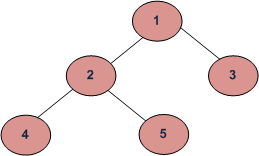

Depth First Traversals: 
1. Inorder (Left, Root, Right) : 4 2 5 1 3 
2. Preorder (Root, Left, Right) : 1 2 4 5 3 
3. Postorder (Left, Right, Root) : 4 5 2 3 1

In [64]:
def traverse_in_order(node):
  if node is None:
    return []
  return (traverse_in_order(node.left) + [node.key] + traverse_in_order(node.right))

In [65]:
tree= parse_tuple(((1,3,None),2,((None,3,4),5,(6,7,8))))

data: ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))
data: (1, 3, None)
data: 1
data: None
data: ((None, 3, 4), 5, (6, 7, 8))
data: (None, 3, 4)
data: None
data: 4
data: (6, 7, 8)
data: 6
data: 8


In [66]:
display_keys(tree, '  ')

      8
    7
      6
  5
      4
    3
      ∅
2
    ∅
  3
    1


In [67]:
traverse_in_order(tree)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [68]:
#InOrder Traversal Program:
class Tree(object):
  def __init__(self, key):
    self.key= key
    self.left= None
    self.right= None

class Solution(object):
  def InOrderTraversal(self, node):
    if node is None:
      return []
    return self.InOrderTraversal(node.left) + [node.key] + self.InOrderTraversal(node.right) 

In [69]:
list= [1,None,2,None,3,None,5,None,6]

In [70]:
node0= Tree(list[0])
node1= Tree(list[1])
node2= Tree(list[2])
node3= Tree(list[3])
node4= Tree(list[4])
node5= Tree(list[5])
node6= Tree(list[6])
node7= Tree(list[7])
node8= Tree(list[8])

In [71]:
node0.left= node1
node0.right= node2
node2.left= node3
node2.right= node4
node4.left= node5
node4.right= node6
node6.left= node7
node6.right= node8

In [72]:
node= node0

In [73]:
s0= Solution()

In [74]:
s0.InOrderTraversal(node)

[None, 1, None, 2, None, 3, None, 5, 6]

In [75]:
#Height of Binary Tree(MinDepth)

In [76]:
def MinDepth(root):
  if root is None:
    return 0  

  if root.left is None and root.right is None:
    return 1
    
  if root.left is None:
    return MinDepth(root.right)+1

  if root.right is None:
    return MinDepth(root.left)+1

  return min(MinDepth(root.left), MinDepth(root.right))+1

In [77]:
MinDepth(node)

2

In [78]:
def MaxDepth(root):
  if root is None:
    return 0    
  return max(MaxDepth(root.left), MaxDepth(root.right))+1

In [79]:
MaxDepth(node)

5

In [80]:
#Tree size (Total Nodes in a Tree)

In [81]:
def TreeSize(node):
  if node is None:
    return 0
  return TreeSize(node.left)+TreeSize(node.right)+1

In [82]:
TreeSize(node)

9